<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/02-MLP-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Conectar la notebook en modo GPU

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

# Redes Neuronales MLP para clasificación

<img align="center" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/img/mlp.png"/>

En esta notebook usaremos una red neuronal de tipo **MultiLayer Perceptron (MLP)** para el problema de clasificación en el dataset MNIST.

Al final, practicaremos el uso de estas redes para buscar un mejor modelo para esta tarea.

Benchmarks para el dataset MNIST

1. **No Routing Needed Between Capsules**, 2020. *Accuracy: 99.87%*

    Modelo de redes CNN con Homogeneous Vector Capsules (HVCs) que modifican el flujo de datos entre capas. [Artículo](https://arxiv.org/abs/2001.09136), [código](https://github.com/AdamByerly/BMCNNwHFCs).

2. **An Ensemble of Simple Convolutional Neural Network Models for MNIST Digit Recognition**, 2020. *Accuracy: 99.87%*

    Modelo de ensamble de redes CNN [Artículo](https://arxiv.org/abs/2008.10400), [código](https://github.com/ansh941/MnistSimpleCNN).

## 1. El conjunto de datos

Observar que, ahora sí, usamos todo el conjunto de datos completo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Hacemos una copia del 'y_test', la usaremos al final

11490434/11490434 [==============================] - 2s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Visualizamos 6 ejemplos, junto con sus etiquetas

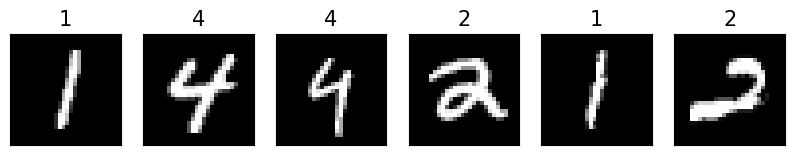

In [3]:
# ------ Obtenemos algunos índices aleatorios:
some_idxs = np.random.choice(list(range(y_train.shape[0])),size=6,replace=False)

fig, axes = plt.subplots(ncols=6, sharex=False,
			 sharey=True, figsize=(10, 4))
for i,idx in enumerate(some_idxs):
	axes[i].set_title(y_train[idx],fontsize=15)
	axes[i].imshow(X_train[idx], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

## Definiendo la red

**IMPORTANTE❗**

Al usar redes neuronales, usalmente el vector de etiquetas debe estar codificado como vectores **one-hot**. Es decir:

$$1 → (1,0,...,0) $$
$$2 → (0,1,...,0) $$
$$ ... $$

Entonces, las etiquetas $y$ son matrices de tamaño $N\times m$ donde

* $N$: número de instancias
* $m$: número de clases

Hacemos la codificación usando la función [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) de [keras](https://www.tensorflow.org/guide/keras).

In [4]:
from tensorflow.keras.utils import to_categorical

print("---------- Antes de la codificación ----------")
print(f"Primeras 5 etiquetas: {y_train[:5]}")
print(f"Shape: {y_train.shape}")

y_train = to_categorical(y_train,num_classes=10)

print("---------- Después de la codificación ----------")
print(f"Primeras 5 etiquetas:\n{y_train[:5]}")
print(f"Shape: {y_train.shape}")

y_test = to_categorical(y_test,num_classes=10)

---------- Antes de la codificación ----------
Primeras 5 etiquetas: [5 0 4 1 9]
Shape: (60000,)
---------- Después de la codificación ----------
Primeras 5 etiquetas:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Shape: (60000, 10)


En TensorFlow las redes se definen a partir de los tipos de capas y elementos, de manera secuencial y por separado:

* **Dense**: implementa la operación: output = activation(dot(input, kernel) + bias) donde activation es la función de activación por elementos pasada como argumento de activación, kernel es una matriz de pesos creada por la capa, y bias es un vector de sesgo creado por la capa (sólo aplicable si use_bias es True).
* **Flatten**: Aplana los datos para tener un arreglo unidimensional.
* **Sequential**: Agrupa una secuencia de capas para formar un modelo.

In [5]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

Definimos la arquitectura de la red neuronal. Observa la elección de:
* Activaciones
* Función de perdida
* Optimizador
* Métrica de desempeño

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(8, activation='tanh'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

model.summary()

model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc']
		  )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ⚡ Visualizando la arquitectura de la red

A continuación se presentan dos maneras de visualizar la arquitectura de la red.

### 1. Usando visualkeras

In [ ]:
!pip install -q visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.0 MB/s eta 0:00:00


In [ ]:
from visualkeras import layered_view

layered_view(model,legend=True, draw_volume=True,draw_funnel=True)

### Usando `plot_model` de keras

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

## Entrenando la red

Entrenamos la red con el método `fit`, usamos 8 épocas

Observa que, para realizar el entrenamiento, usamos el conjunto de validación también. Este sirve para proporcionar un indicador no sesgado del desempeño del modelo.

<img align="left" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/img/training-validation-test.png"/>

In [7]:
n_epocas = 8

history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/8
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2365 - acc: 0.6115 - val_loss: 0.8373 - val_acc: 0.7422
Epoch 2/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7848 - acc: 0.7540 - val_loss: 0.6875 - val_acc: 0.8057
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7202 - acc: 0.7804 - val_loss: 0.7492 - val_acc: 0.7563
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6944 - acc: 0.7801 - val_loss: 0.6550 - val_acc: 0.7923
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6646 - acc: 0.7985 - val_loss: 0.5951 - val_acc: 0.8243
Epoch 6/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6487 - acc: 0.8046 - val_loss: 0.6861 - val_acc: 0.7882
Epoch 7/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6468 - acc: 0.8043 - val_loss: 0.6346 - val_acc: 0.8151
Epoch 8/8
1875/1875 [==============================] - 9s 5ms/st

Graficamos la función de perdida en cada época, tanto en el conjunto de entrenamiento, como en el de validación.

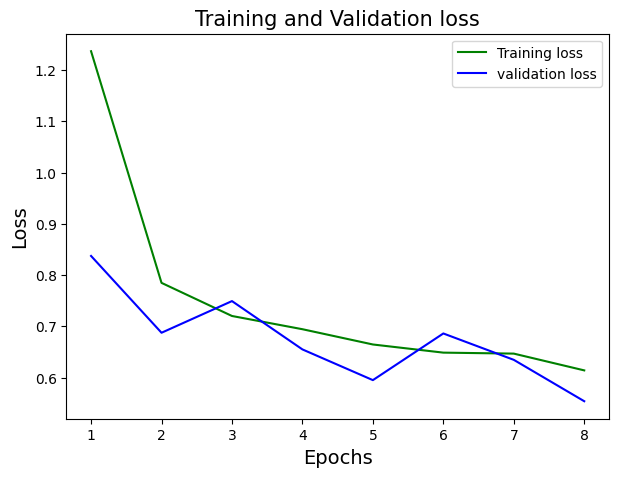

In [8]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.show()

Ahora, graficamos el accuracy a lo largo del entrenamiento, tanto en el conjunto de entrenamiento como en el validación.

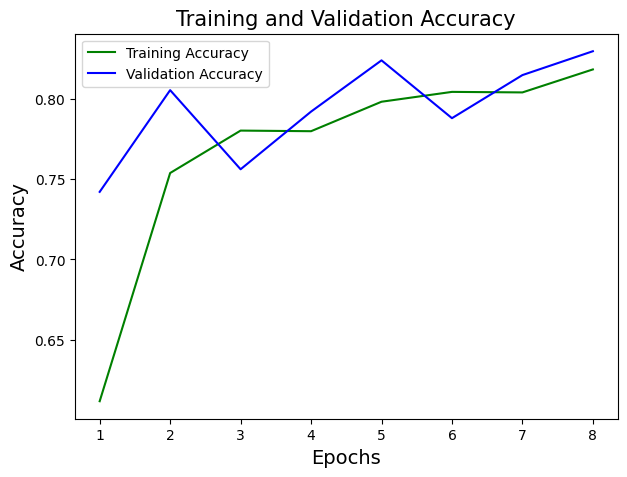

In [9]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

De la siguiente forma podemos acceder a la matriz de pesos y sesgos en cada capa. Las guardamos como arreglos de numpy. Son los pesos usados en la notebook anterior.

In [ ]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]

np.save("mnist_weights1.npy",first_layer_weights)
np.save("mnist_biases1.npy",first_layer_biases)

In [ ]:
second_layer_weights = model.layers[2].get_weights()[0]
second_layer_biases  = model.layers[2].get_weights()[1]

np.save("mnist_weights2.npy",second_layer_weights)
np.save("mnist_biases2.npy",second_layer_biases)

## Predicciones y rendimiento

¿Cómo se ven las predicciones?

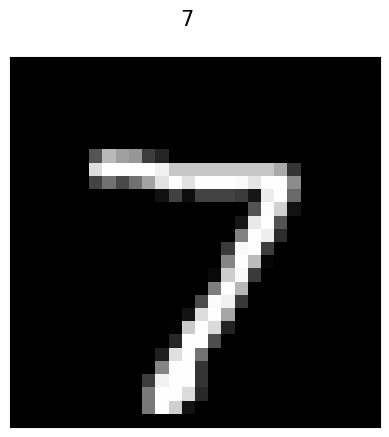

1/1 [==============================] - 0s 103ms/step

Salida de la red neuronal para este primer elemento:
 [[0.    0.    0.002 0.001 0.    0.    0.    0.995 0.    0.001]]

Son probabilidades, la suma de las entradas es 0.9999999403953552

Tomamos el índice de la entrada con mayor probabilidad: [7]


In [10]:
x = X_test[0].copy()

# ----- Graficamos este primer ejemplo de prueba:
plt.figure()
plt.suptitle(y_test_original[0],fontsize=15)
plt.imshow(x, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# ----- Cambiamos a la forma adecuada para entrar a la red neuronal:
x_input = x.reshape(-1,x.shape[0],x.shape[1])

# ----- Lo pasamos por la red neuronal ya entrenada:
prediction = model.predict(x_input)
print(f"\nSalida de la red neuronal para este primer elemento:\n {np.round(prediction,3)}\n")

print(f"Son probabilidades, la suma de las entradas es {np.sum(prediction)}")

# ----- Tomamos el argmax:
prediction = np.argmax(prediction, axis=1)
print(f"\nTomamos el índice de la entrada con mayor probabilidad: {prediction}")

Obtenemos todas las predicciones sobre el conjunto de prueba:

In [11]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)

313/313 [==============================] - 2s 6ms/step


Visualizamos algunas predicciones

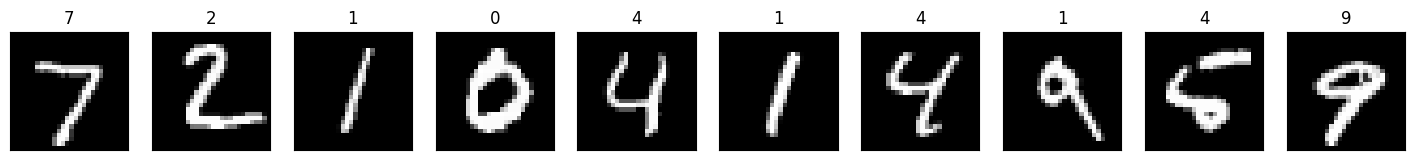

In [12]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(18, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Obtenemos las métricas de desempeño de la tarea de clasificación. Observar que ambas son **vectores** de etiquetas

In [13]:
print(predictions.shape)
print(y_test_original.shape)

(10000,)
(10000,)


In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.83
Test Recall: 0.8271171567562157
Test Precision: 0.8276977481877259


Calculamos el roc-auc score

In [ ]:
from sklearn.metrics import roc_auc_score

print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test,predictions_matrix)

Mostramos la matriz de confusión

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())+1) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())+1) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_original,predictions)
show_confusion_matrix(cm)

⭕ ¿Qué dígitos son los que más confunde la red?

---

## ⭕ Práctica y Ejercicios

Implementa las siguientes redes neuronales de tipo MLP:

* 1 capa oculta de 200 neuronas sin activación. Entrena durante 30 épocas.
* 1 capa oculta de 200 neuronas con activación $tanh$. Entrena durante 30 épocas.
* 3 capas ocultas de 100, 200 y 100 neuronas respectivamente, todas con activación ReLU. Entrena durante 50 épocas.

En cada uno de los experimentos determina las especificaciones de las capas de entrada y salida. Además, en cada caso, reporta el accuracy y recall en el conjunto de prueba.

* Con el objetivo de subir la métrica de accuracy en el conjunto de prueba, entrena un nuevo módelo de red neuronal MLP cambiando los siguientes hiperparámetros:

* Número de capas ocultas.
* Número de neuronas en cada capa oculta.
* Función de activación de cada capa oculta.
* Optimizador ([opciones](https://keras.io/api/optimizers/)).


---


Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/, https://paperswithcode.com/sota/image-classification-on-mnist




Esta es una estrategia que produce alrededor del 97% en las métricas de rendimiento.

Además, **muestro cómo monitorear también el recall** durante el entrenamiento adicionalmente del accuracy.

In [2]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [9]:
from tensorflow.keras.metrics import Recall
from keras.optimizers import Adamax
from keras.initializers import HeNormal

rec = Recall()

initializer = HeNormal()

model = Sequential()
model.add(Flatten(input_shape=(28,28),name='Entrada'))
model.add(Dense(512, activation='relu',name='Capa_Oculta',
                kernel_initializer=initializer))
model.add(Dense(10, activation='softmax',name='Salida'))

model.summary()

optimizer = Adamax(learning_rate=0.09)

model.compile(loss='categorical_crossentropy',
	      optimizer='adamax',
	      metrics=['acc',rec]
		  )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (Flatten)           (None, 784)               0         
                                                                 
 Capa_Oculta (Dense)         (None, 512)               401920    
                                                                 
 Salida (Dense)              (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test),
                    batch_size=50)

Epoch 1/50
1200/1200 [==============================] - 6s 4ms/step - loss: 5.5183 - acc: 0.8984 - recall_3: 0.8984 - val_loss: 2.2167 - val_acc: 0.9400 - val_recall_3: 0.9400
Epoch 2/50
1200/1200 [==============================] - 4s 4ms/step - loss: 1.5792 - acc: 0.9492 - recall_3: 0.9492 - val_loss: 1.4128 - val_acc: 0.9584 - val_recall_3: 0.9584
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.8040 - acc: 0.9671 - recall_3: 0.9671 - val_loss: 1.1999 - val_acc: 0.9601 - val_recall_3: 0.9601
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4637 - acc: 0.9765 - recall_3: 0.9765 - val_loss: 1.0013 - val_acc: 0.9644 - val_recall_3: 0.9644
Epoch 5/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2699 - acc: 0.9830 - recall_3: 0.9830 - val_loss: 1.0715 - val_acc: 0.9623 - val_recall_3: 0.9622
Epoch 6/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1991 - acc: 0.9860 - recall_3: 0.9860 - va

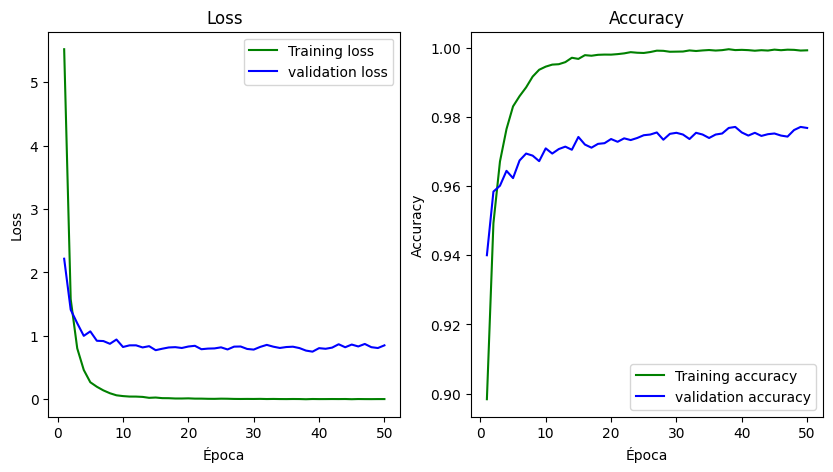

In [11]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['acc']
acc_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(epochs, loss_train, 'g', label='Training loss')
axs[0].plot(epochs, loss_val, 'b', label='validation loss')
axs[0].title.set_text('Loss')
axs[0].set(xlabel="Época", ylabel="Loss")
axs[0].legend()
axs[1].plot(epochs, acc_train, 'g', label='Training accuracy')
axs[1].plot(epochs, acc_val, 'b', label='validation accuracy')
axs[1].title.set_text('Accuracy')
axs[1].set(xlabel="Época", ylabel="Accuracy")
axs[1].legend()

fig.show()

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9768
Test Recall: 0.9765569945092377
Test Precision: 0.9766596455174632
